# Introduction to GeoPandas

This notebook is self-contained, and has code used in the "Intro to GeoPandas" video on our [youtube channel](https://www.youtube.com/channel/UC34uByppapyrr-gubZMd9OQ).  Please feel free to reach out with any questions. 

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
# Links to pull data from the DC OpenData portal

neighborhood_laydown = "https://opendata.arcgis.com/datasets/f6c703ebe2534fc3800609a07bad8f5b_17.geojson"
# If this url fails, you can download the geojson from here: https://dc.esri.com/datasets/dcdev::dc-neighborhood-clusters-1"

datasets = {
    "2021": "https://opendata.arcgis.com/datasets/da3da798fb4f4f0e9de5c3a17c39351f_10.geojson",
    "2020": "https://opendata.arcgis.com/datasets/ac617c291bbd466bbbea6272f87811d3_8.geojson",
    "2019": "https://opendata.arcgis.com/datasets/107f535e5d3347a8ac1e46dbc13669d4_6.geojson",
    "2018": "https://opendata.arcgis.com/datasets/ca581e1b455a46caa266e3476f8205d2_0.geojson",
    "2017": "https://opendata.arcgis.com/datasets/585c8c3ef58c4f1ab1ddf1c759b3a8bd_39.geojson",
    "2016": "https://opendata.arcgis.com/datasets/2dc1a7dbb705471eb38af39acfa16238_28.geojson", 
    "2015": "https://opendata.arcgis.com/datasets/b3283607f9b74457aff420081eec3190_29.geojson",
    "2014": "https://opendata.arcgis.com/datasets/54b57e15f6944af8b413a5e4f88b070c_13.geojson",
    "2013": "https://opendata.arcgis.com/datasets/3d49e06d51984fa2b68f21eed21eba1f_14.geojson",
    "2012": "https://opendata.arcgis.com/datasets/9cbe8553d4e2456ab6c140d83c7e83e0_15.geojson"
}

## Read in the Neighborhood Laydown

In [3]:
gdf_neigh = gpd.read_file(neighborhood_laydown)

In [4]:
gdf_neigh.head()

,OBJECTID,WEB_URL,NAME,NBH_NAMES,TYPE,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,SHAPEAREA,SHAPELEN,geometry
0,1,http://planning.dc.gov/,Cluster 16,"Colonial Village, Shepherd Park, North Portal ...",Original,{8D235E97-D58C-4891-943E-307143103BD9},None,None,None,None,0,0,"POLYGON ((-77.02829 38.98608, -77.02952 38.987..."
1,2,None,Cluster 41,Rock Creek Park,Additional,{939C23A8-8EE2-4B4F-85EE-88281BCCC9A0},None,None,None,None,0,0,"POLYGON ((-77.04391 38.98432, -77.04418 38.984..."
2,3,http://planning.dc.gov/,Cluster 10,"Hawthorne, Barnaby Woods, Chevy Chase",Original,{8EADC8B8-3DAD-4E5D-AAF8-BF63D8316317},None,None,None,None,0,0,"POLYGON ((-77.05530 38.95900, -77.05530 38.959..."
3,4,http://planning.dc.gov/,Cluster 17,"Takoma, Brightwood, Manor Park",Original,{5BF4BCEC-5022-4B96-9577-C0246154197C},None,None,None,None,0,0,"POLYGON ((-77.01418 38.97237, -77.01403 38.972..."
4,5,None,Cluster 40,Walter Reed,Additional,{C6705A7B-212E-419A-93CB-DA60707D0C37},None,None,None,None,0,0,"POLYGON ((-77.03286 38.97800, -77.03297 38.978..."


In [5]:
type(gdf_neigh)

geopandas.geodataframe.GeoDataFrame

In [6]:
gdf_neigh.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gdf_neigh.to_crs(3857).area.sum()

293472467.71598697

<AxesSubplot:>

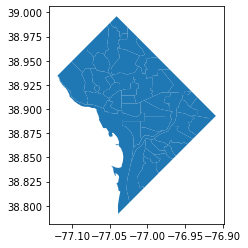

In [8]:
gdf_neigh.plot()

## Read in the Construction Permit Files

In [9]:
df_list = []
for year, url in datasets.items():  
    gdf = gpd.read_file(url)
    gdf['year'] = year
    
    df_list.append(gdf)

In [10]:
gdf = pd.concat(df_list)
gdf.shape

(151524, 34)

## Perform a spatial join to add cluster and neighborhood name to the permit data

In [11]:
gdf_join = gdf.sjoin(gdf_neigh[['NAME', 'NBH_NAMES', 'geometry']], how="left", predicate="within")

In [12]:
gdf_join.head(2)

,OBJECTID,APPLICATIONDATE,ISEXCAVATION,ISFIXTURE,ISPAVING,ISLANDSCAPING,ISPROJECTIONS,ISPSRENTAL,TRACKINGNUMBER,PERMITNUMBER,...,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry,year,index_right,NAME,NBH_NAMES
0,95152658,2019-04-26T15:13:11+00:00,F,T,F,F,F,F,330005,PA330005,...,{D44B1628-F597-03FC-E053-792F520A2FD8},None,None,None,None,POINT (-76.95384 38.88363),2021,37.0,Cluster 32,"River Terrace, Benning, Greenway, Dupont Park"
1,95153259,2016-06-15T18:47:18+00:00,T,F,T,F,F,F,179259,None,...,{D44B1628-F7F0-03FC-E053-792F520A2FD8},None,None,None,None,POINT (-77.00783 38.87624),2021,42.0,Cluster 27,"Near Southeast, Navy Yard"


## Create a table of counts per cluster per year

In [13]:
counts_by_year = gdf_join.value_counts(['year', 'NAME']).to_frame().reset_index().sort_values(['NAME', 'year'])

In [14]:
counts_by_year.columns = ['year', 'cluster', 'permit_count']
counts_by_year

,year,cluster,permit_count
312,2012,Cluster 1,148
216,2013,Cluster 1,263
192,2014,Cluster 1,300
124,2015,Cluster 1,432
149,2016,Cluster 1,381
...,...,...,...
144,2017,Cluster 9,389
113,2018,Cluster 9,462
116,2019,Cluster 9,450
64,2020,Cluster 9,612


## Convert that table into one row per cluster, with years as columns

In [15]:
pivoted = counts_by_year.pivot(index="cluster", columns='year', values='permit_count')

In [16]:
pivoted_gdf = pd.merge(pivoted, gdf_neigh[['NAME', 'NBH_NAMES', 'geometry']], how="left", left_index=True, right_on="NAME")

In [17]:
pivoted_gdf = gpd.GeoDataFrame(pivoted_gdf, geometry='geometry', crs=4326)

In [18]:
type(pivoted_gdf)

geopandas.geodataframe.GeoDataFrame

## Add the percent change from 2012 to 2021

In [21]:
pivoted_gdf['perc_change'] = (pivoted_gdf['2021'] / pivoted_gdf['2012']) * 100 - 100

In [22]:
top_10 = pivoted_gdf.sort_values('perc_change', ascending=False).head(10)

## Plot the ten clusters with the highest 'Percent Change'

In [23]:
import matplotlib.pyplot as plt

In [24]:
years = top_10.columns[0:-4]
years

Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='object')

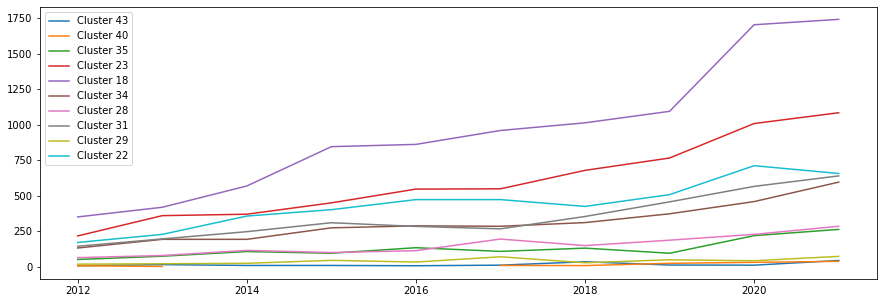

In [25]:
plt.figure(figsize=(15, 5))

for idx, row in top_10.iterrows():
    plt.plot(years, row[years], label=row['NAME'])
plt.legend()

## Plot all neighborhood clusters as a map

<AxesSubplot:>

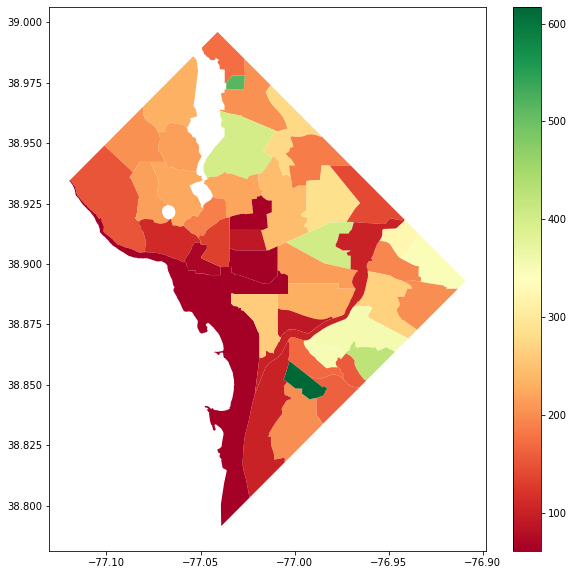

In [26]:
pivoted_gdf.plot(column='perc_change', cmap='RdYlGn', legend=True, figsize=(10, 10))

# Write to file

In [31]:
pivoted_gdf.to_file("construction_counts_by_cluster_by_year.geojson", driver="GeoJSON")